In [4]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

Install libraries

In [5]:
data = pd.read_csv('xy_data.csv')
x_data = data['x'].values
y_data = data['y'].values
N = len(x_data)
t = np.linspace(6, 60, N)

* Load the CSV containing the points
* x_data and y_data are extracted as NumPy arrays for easier mathematical operations
* N is the total number of points
* t is generated uniformly from 6 to 60 because the parametric equations depend on t

In [6]:
def model(params, t):
    theta, M, X = params
    x = t * np.cos(theta) - np.exp(M * np.abs(t)) * np.sin(0.3*t) * np.sin(theta) + X
    y = 42 + t * np.sin(theta) + np.exp(M * np.abs(t)) * np.sin(0.3*t) * np.cos(theta)
    return x, y


* This function generates predicted (x, y) points given:
  * theta: angle in radians
  * M: exponential growth factor
  * X: horizontal shift
* The equations are exactly the parametric equations given in the assignment.
* Returns x and y arrays for the given t values.

In [7]:
def loss(params, t, x_data, y_data):
    x_model, y_model = model(params, t)
    return np.sum(np.abs(x_data - x_model) + np.abs(y_data - y_model))


* The loss function measures how far your
predicted curve is from the given points.
* It computes the L1 distance, i.e., the sum of absolute differences between the predicted and actual points for both x and y

In [8]:
initial_guess = [np.deg2rad(25), 0.0, 50]
bounds = [(0, np.deg2rad(50)), (-0.05, 0.05), (0, 100)]

* initial_guess provides a starting point for the optimizer
* bounds restricts parameters to the ranges

In [9]:
res = minimize(loss, initial_guess, args=(t, x_data, y_data), bounds=bounds)
theta_opt, M_opt, X_opt = res.x
theta_deg = np.rad2deg(theta_opt)


* scipy.optimize.minimize searches for the parameter values that minimize the L1 loss
* res.x contains the optimized values for [theta, M, X]
* Convert theta back to degrees for easier interpretation

In [10]:
x_fit, y_fit = model([theta_opt, M_opt, X_opt], t)


* Using the optimized parameters, the model generates the predicted (x, y) points

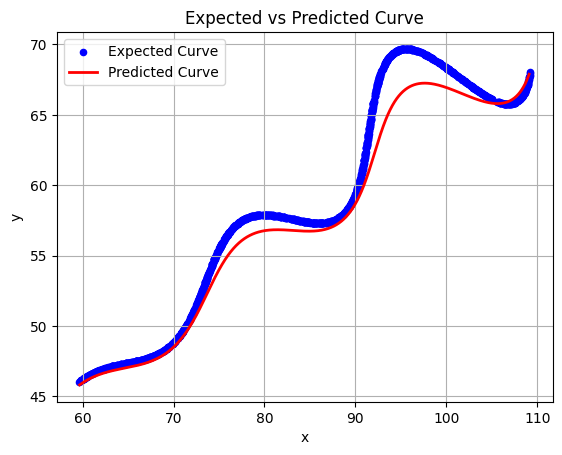

In [11]:
plt.scatter(x_data, y_data, color='blue', s=20, label='Expected Curve')
plt.plot(x_fit, y_fit, color='red', linewidth=2, label='Predicted Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Expected vs Predicted Curve')
plt.legend()
plt.grid(True)
plt.show()


* Plots the actual data points (blue dots) and the fitted curve (red line)
* This visualization helps verify how well the parametric model fits the data

In [12]:
l1_distance = np.sum(np.abs(x_data - x_fit) + np.abs(y_data - y_fit))
avg_L1 = l1_distance / N
print("Average L1 per point:", avg_L1)


Average L1 per point: 25.24339591808366


Smaller average L1 → better fit

In [13]:
print(f"Theta (deg): {theta_deg:.4f}")
print(f"M: {M_opt:.5f}")
print(f"X: {X_opt:.4f}")

Theta (deg): 28.1184
M: 0.02139
X: 54.9008
